# IMPORTANDO LIBRERIAS


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_style('whitegrid')
import matplotlib.pyplot as plt
plt.style.use("fivethirtyeight")
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, max_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
import optuna
from keras.models import Sequential
from keras.callbacks import EarlyStopping
from keras.layers import Dense, LSTM, Dropout
from tensorflow.keras.layers import Dropout, BatchNormalization
from sklearn.preprocessing import MinMaxScaler

# DATOS

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [3]:
df_solar = pd.read_csv('https://raw.githubusercontent.com/Mbenitez11/Prediccion-de-generacin-de-energia-solar-y-analisis-de-fallas/refs/heads/main/results/df_solar.csv')

In [4]:
df_solar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 435845 entries, 0 to 435844
Data columns (total 17 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   DATE_TIME            435845 non-null  object 
 1   AMBIENT_TEMPERATURE  435845 non-null  float64
 2   MODULE_TEMPERATURE   435845 non-null  float64
 3   WIND_SPEED           435798 non-null  float64
 4   IRRADIATION          435845 non-null  float64
 5   DC_POWER             435845 non-null  float64
 6   DC_CURRENT           435845 non-null  float64
 7   SEASON               435845 non-null  int64  
 8   Day                  435845 non-null  int64  
 9   DATE                 435845 non-null  object 
 10  TIME                 435845 non-null  object 
 11  DAY                  435845 non-null  int64  
 12  MONTH                435845 non-null  int64  
 13  HOURS                435845 non-null  int64  
 14  MINUTES              435845 non-null  int64  
 15  TOTAL MINUTES PAS

In [5]:
df_solar['DATE_TIME'] = pd.to_datetime(df_solar['DATE_TIME'])

In [6]:
df_solar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 435845 entries, 0 to 435844
Data columns (total 17 columns):
 #   Column               Non-Null Count   Dtype                    
---  ------               --------------   -----                    
 0   DATE_TIME            435845 non-null  datetime64[ns, UTC-05:00]
 1   AMBIENT_TEMPERATURE  435845 non-null  float64                  
 2   MODULE_TEMPERATURE   435845 non-null  float64                  
 3   WIND_SPEED           435798 non-null  float64                  
 4   IRRADIATION          435845 non-null  float64                  
 5   DC_POWER             435845 non-null  float64                  
 6   DC_CURRENT           435845 non-null  float64                  
 7   SEASON               435845 non-null  int64                    
 8   Day                  435845 non-null  int64                    
 9   DATE                 435845 non-null  object                   
 10  TIME                 435845 non-null  object            

In [7]:
df_solar[df_solar[ ['IRRADIATION' ] ] < 0.001].groupby(df_solar['DATE_TIME'].dt.hour) [['IRRADIATION']].count()

,IRRADIATION
DATE_TIME,
0,16817
1,16175
2,16597
3,16348
4,14463
5,8020
6,3634
7,302
8,0


In [8]:
df_solar = df_solar.fillna(0)


In [9]:
df_solar.isnull().sum()

DATE_TIME              0
AMBIENT_TEMPERATURE    0
MODULE_TEMPERATURE     0
WIND_SPEED             0
IRRADIATION            0
DC_POWER               0
DC_CURRENT             0
SEASON                 0
Day                    0
DATE                   0
TIME                   0
DAY                    0
MONTH                  0
HOURS                  0
MINUTES                0
TOTAL MINUTES PASS     0
DATE_STRING            0
dtype: int64

In [10]:
df2 = df_solar.copy()
X= df2[['DATE_TIME', 'AMBIENT_TEMPERATURE','MODULE_TEMPERATURE','WIND_SPEED','SEASON']]
y = df2[['IRRADIATION']]

In [11]:
X.iloc[1000:1100]

,DATE_TIME,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,WIND_SPEED,SEASON
1000,2017-01-20 19:32:00-05:00,7.887,7.358,0.6,2
1001,2017-01-20 19:33:00-05:00,7.888,7.361,0.4,2
1002,2017-01-20 19:34:00-05:00,7.912,7.364,0.7,2
1003,2017-01-20 19:35:00-05:00,7.912,7.366,0.9,2
1004,2017-01-20 19:36:00-05:00,7.884,7.367,0.7,2
...,...,...,...,...,...
1095,2017-01-20 21:16:00-05:00,7.856,7.475,0.8,2
1096,2017-01-20 21:17:00-05:00,7.835,7.474,2.3,2
1097,2017-01-20 21:18:00-05:00,7.814,7.467,1.1,2
1098,2017-01-20 21:19:00-05:00,7.791,7.464,1.6,2


In [12]:
y.iloc[1000:1100]

,IRRADIATION
1000,0.000352
1001,0.000305
1002,0.000305
1003,0.000305
1004,0.000305
...,...
1095,0.000315
1096,0.000314
1097,0.000312
1098,0.000364


In [13]:
from sklearn.model_selection import train_test_split
X_regresor= df2[['AMBIENT_TEMPERATURE','MODULE_TEMPERATURE','WIND_SPEED','SEASON']]
y_regresor = df2[['IRRADIATION']]
X_train,X_test,y_train,y_test = train_test_split(X_regresor,y_regresor,test_size=.2,random_state=21)

# SARIMA

In [16]:
df1 = df_solar.copy()
df1=df1[['DATE_TIME', 'MODULE_TEMPERATURE', 'AMBIENT_TEMPERATURE', 'IRRADIATION', 'WIND_SPEED']]
df1.set_index('DATE_TIME', inplace=True)

df1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 435845 entries, 2017-01-20 00:00:00-05:00 to 2017-12-13 23:58:00-05:00
Data columns (total 4 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   MODULE_TEMPERATURE   435845 non-null  float64
 1   AMBIENT_TEMPERATURE  435845 non-null  float64
 2   IRRADIATION          435845 non-null  float64
 3   WIND_SPEED           435845 non-null  float64
dtypes: float64(4)
memory usage: 16.6 MB



### COMO NUESTRO DATASET TIENE DATOS CADA 1 MINUTO, HACEMOS UN PROMEDIO POR HORA PARA REDUCIR EL TIEMPO DE ENTRENAMIENTO

In [31]:


# Calcula el promedio en horas
# Promedio por cada hora
df_hourly_avg = df1.resample('H').mean()


# Si quieres resetear el índice para tener la fecha como columna:
df_hourly_avg = df_hourly_avg.reset_index()


In [32]:
from statsmodels.tools.sm_exceptions import ValueWarning
import warnings

# Filtrar la advertencia
warnings.filterwarnings("ignore", category=ValueWarning)



In [33]:
df_hourly_avg = df_hourly_avg.fillna(method='ffill')  # Rellena valores faltantes hacia adelante


In [34]:
df_hourly_avg.isnull().sum()

DATE_TIME              0
MODULE_TEMPERATURE     0
AMBIENT_TEMPERATURE    0
IRRADIATION            0
WIND_SPEED             0
dtype: int64

In [35]:
df_hourly_avg['DATE_TIME'] = pd.to_datetime(df_hourly_avg['DATE_TIME'])
df_hourly_avg.set_index('DATE_TIME', inplace=True)

In [36]:
df_hourly_avg.head()

,MODULE_TEMPERATURE,AMBIENT_TEMPERATURE,IRRADIATION,WIND_SPEED
DATE_TIME,,,,
2017-01-01 00:00:00-05:00,4.838128,6.552489,0.000458,4.446809
2017-01-01 01:00:00-05:00,2.365638,6.002468,0.000482,2.978723
2017-01-01 02:00:00-05:00,0.019255,5.240327,0.000512,1.825455
2017-01-01 03:00:00-05:00,-0.730867,4.760217,0.000562,1.861667
2017-01-01 04:00:00-05:00,2.146925,4.609264,0.000557,1.733962


In [37]:
df_hourly_avg.index = df_hourly_avg.index.tz_localize(None)


In [137]:
train_size = int(len(df_hourly_avg) * 0.8)
train, test = df_hourly_avg.iloc[:train_size], df_hourly_avg.iloc[train_size:]

In [109]:
print(df_hourly_avg.index)  # Debe mostrar un DatetimeIndex
print(df_hourly_avg.isnull().sum())  # Para verificar valores faltantes


DatetimeIndex(['2017-01-01 00:00:00', '2017-01-01 01:00:00',
               '2017-01-01 02:00:00', '2017-01-01 03:00:00',
               '2017-01-01 04:00:00', '2017-01-01 05:00:00',
               '2017-01-01 06:00:00', '2017-01-01 07:00:00',
               '2017-01-01 08:00:00', '2017-01-01 09:00:00',
               ...
               '2017-12-31 09:00:00', '2017-12-31 10:00:00',
               '2017-12-31 11:00:00', '2017-12-31 12:00:00',
               '2017-12-31 13:00:00', '2017-12-31 14:00:00',
               '2017-12-31 15:00:00', '2017-12-31 16:00:00',
               '2017-12-31 17:00:00', '2017-12-31 18:00:00'],
              dtype='datetime64[ns]', name='DATE_TIME', length=8755, freq=None)
MODULE_TEMPERATURE     0
AMBIENT_TEMPERATURE    0
IRRADIATION            0
WIND_SPEED             0
dtype: int64


### PROMEDIO DIARIO

In [114]:
# Calcula el promedio en horas
# Promedio por cada hora
df_mes_avg = df1.resample('D').mean()


# Si quieres resetear el índice para tener la fecha como columna:
df_mes_avg = df_mes_avg.reset_index()

In [115]:
df_mes_avg = df_mes_avg.fillna(method='ffill')

In [116]:
df_mes_avg['DATE_TIME'] = pd.to_datetime(df_mes_avg['DATE_TIME'])
df_mes_avg.set_index('DATE_TIME', inplace=True)

In [118]:
df_hourly_avg.index = df_hourly_avg.index.tz_localize(None)

In [119]:
df_mes_avg.head()

,MODULE_TEMPERATURE,AMBIENT_TEMPERATURE,IRRADIATION,WIND_SPEED
DATE_TIME,,,,
2017-01-01 00:00:00-05:00,8.466270,7.129132,0.104105,2.010046
2017-01-02 00:00:00-05:00,5.101611,5.142576,0.014193,2.571813
2017-01-03 00:00:00-05:00,6.429156,5.498900,0.029707,1.792029
2017-01-04 00:00:00-05:00,9.713700,7.900861,0.128543,4.005962
2017-01-05 00:00:00-05:00,-0.019191,-0.913235,0.055021,2.236201


### OPTIMIZANDO LOS HIPERPARAMETROS CON OPTUNA

In [110]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error
import optuna

#### Estacionalidad por horas

In [151]:
def objective(trial):
    # Sugerir hiperparámetros
    p = trial.suggest_int('p', 0, 5)
    d = trial.suggest_int('d', 0, 2)
    q = trial.suggest_int('q', 0, 5)
    P = trial.suggest_int('P', 0, 2)
    D = trial.suggest_int('D', 0, 1)
    Q = trial.suggest_int('Q', 0, 2)
    seasonal_hourly = 24

    try:
        # Ajustar el modelo
        model = SARIMAX(
            endog=test['IRRADIATION'],
            exog=test[['AMBIENT_TEMPERATURE', 'MODULE_TEMPERATURE', 'WIND_SPEED']],
            order=(p, d, q),
            seasonal_order=(P, D, Q, seasonal_hourly),
            enforce_stationarity=False,
            enforce_invertibility=False
        )
        model_fit = model.fit(disp=False)

        # Proporcionar valores exógenos futuros para la predicción
        future_exog = test[['AMBIENT_TEMPERATURE', 'MODULE_TEMPERATURE', 'WIND_SPEED']].iloc[-len(test):]

        # Generar predicciones
        predictions = model_fit.forecast(steps=len(test), exog=future_exog)

        # Calcular el error de validación
        mae = mean_absolute_error(test['IRRADIATION'], predictions)
    except Exception as e:
        print(f"Error en la iteración {trial.number}: {e}")
        return float('inf')

    return mae


In [154]:

# Optimización con Optuna POR HORAS
import time

def log_progress(study, trial):
    print(f"Trial {trial.number}: Value = {trial.value}, Params = {trial.params}")
    print(f"Number of completed trials: {len(study.trials)}")
    print(f"Best trial so far: Value = {study.best_value}, Params = {study.best_params}")

# Configurar el estudio con el callback
study = optuna.create_study(direction='minimize', sampler=optuna.samplers.RandomSampler(seed=1234))
study.optimize(objective, n_trials=20, callbacks=[log_progress])



[I 2024-11-24 18:02:21,145] A new study created in memory with name: no-name-0c17bdf9-d305-4808-a5d6-93f67dceb7f8
C:\Users\Mathias\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
[I 2024-11-24 18:04:13,000] Trial 0 finished with value: 0.10198735847280352 and parameters: {'p': 1, 'd': 1, 'q': 2, 'P': 2, 'D': 1, 'Q': 0}. Best is trial 0 with value: 0.10198735847280352.


Trial 0: Value = 0.10198735847280352, Params = {'p': 1, 'd': 1, 'q': 2, 'P': 2, 'D': 1, 'Q': 0}
Number of completed trials: 1
Best trial so far: Value = 0.10198735847280352, Params = {'p': 1, 'd': 1, 'q': 2, 'P': 2, 'D': 1, 'Q': 0}


C:\Users\Mathias\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
[I 2024-11-24 18:05:15,462] Trial 1 finished with value: 0.0625312569114842 and parameters: {'p': 1, 'd': 2, 'q': 5, 'P': 2, 'D': 0, 'Q': 1}. Best is trial 1 with value: 0.0625312569114842.


Trial 1: Value = 0.0625312569114842, Params = {'p': 1, 'd': 2, 'q': 5, 'P': 2, 'D': 0, 'Q': 1}
Number of completed trials: 2
Best trial so far: Value = 0.0625312569114842, Params = {'p': 1, 'd': 2, 'q': 5, 'P': 2, 'D': 0, 'Q': 1}


C:\Users\Mathias\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
[I 2024-11-24 18:06:17,087] Trial 2 finished with value: 0.6838538401746891 and parameters: {'p': 4, 'd': 2, 'q': 2, 'P': 1, 'D': 1, 'Q': 0}. Best is trial 1 with value: 0.0625312569114842.


Trial 2: Value = 0.6838538401746891, Params = {'p': 4, 'd': 2, 'q': 2, 'P': 1, 'D': 1, 'Q': 0}
Number of completed trials: 3
Best trial so far: Value = 0.0625312569114842, Params = {'p': 1, 'd': 2, 'q': 5, 'P': 2, 'D': 0, 'Q': 1}


C:\Users\Mathias\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
[I 2024-11-24 18:06:35,025] Trial 3 finished with value: 0.05577731106870215 and parameters: {'p': 4, 'd': 2, 'q': 2, 'P': 1, 'D': 0, 'Q': 1}. Best is trial 3 with value: 0.05577731106870215.


Trial 3: Value = 0.05577731106870215, Params = {'p': 4, 'd': 2, 'q': 2, 'P': 1, 'D': 0, 'Q': 1}
Number of completed trials: 4
Best trial so far: Value = 0.05577731106870215, Params = {'p': 4, 'd': 2, 'q': 2, 'P': 1, 'D': 0, 'Q': 1}


C:\Users\Mathias\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
[I 2024-11-24 18:08:00,749] Trial 4 finished with value: 0.049595580771814037 and parameters: {'p': 5, 'd': 1, 'q': 2, 'P': 2, 'D': 0, 'Q': 1}. Best is trial 4 with value: 0.049595580771814037.


Trial 4: Value = 0.049595580771814037, Params = {'p': 5, 'd': 1, 'q': 2, 'P': 2, 'D': 0, 'Q': 1}
Number of completed trials: 5
Best trial so far: Value = 0.049595580771814037, Params = {'p': 5, 'd': 1, 'q': 2, 'P': 2, 'D': 0, 'Q': 1}


C:\Users\Mathias\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
[I 2024-11-24 18:11:48,288] Trial 5 finished with value: 0.08372414751206943 and parameters: {'p': 5, 'd': 1, 'q': 4, 'P': 0, 'D': 1, 'Q': 2}. Best is trial 4 with value: 0.049595580771814037.


Trial 5: Value = 0.08372414751206943, Params = {'p': 5, 'd': 1, 'q': 4, 'P': 0, 'D': 1, 'Q': 2}
Number of completed trials: 6
Best trial so far: Value = 0.049595580771814037, Params = {'p': 5, 'd': 1, 'q': 2, 'P': 2, 'D': 0, 'Q': 1}


C:\Users\Mathias\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
[I 2024-11-24 18:12:41,312] Trial 6 finished with value: 0.04948872194246293 and parameters: {'p': 1, 'd': 2, 'q': 2, 'P': 2, 'D': 0, 'Q': 0}. Best is trial 6 with value: 0.04948872194246293.


Trial 6: Value = 0.04948872194246293, Params = {'p': 1, 'd': 2, 'q': 2, 'P': 2, 'D': 0, 'Q': 0}
Number of completed trials: 7
Best trial so far: Value = 0.04948872194246293, Params = {'p': 1, 'd': 2, 'q': 2, 'P': 2, 'D': 0, 'Q': 0}


C:\Users\Mathias\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
[I 2024-11-24 18:12:55,524] Trial 7 finished with value: 0.057715306865814726 and parameters: {'p': 0, 'd': 2, 'q': 3, 'P': 1, 'D': 0, 'Q': 1}. Best is trial 6 with value: 0.04948872194246293.


Trial 7: Value = 0.057715306865814726, Params = {'p': 0, 'd': 2, 'q': 3, 'P': 1, 'D': 0, 'Q': 1}
Number of completed trials: 8
Best trial so far: Value = 0.04948872194246293, Params = {'p': 1, 'd': 2, 'q': 2, 'P': 2, 'D': 0, 'Q': 0}


[I 2024-11-24 18:13:17,390] Trial 8 finished with value: 0.2994140447543213 and parameters: {'p': 1, 'd': 1, 'q': 0, 'P': 1, 'D': 1, 'Q': 0}. Best is trial 6 with value: 0.04948872194246293.


Trial 8: Value = 0.2994140447543213, Params = {'p': 1, 'd': 1, 'q': 0, 'P': 1, 'D': 1, 'Q': 0}
Number of completed trials: 9
Best trial so far: Value = 0.04948872194246293, Params = {'p': 1, 'd': 2, 'q': 2, 'P': 2, 'D': 0, 'Q': 0}


C:\Users\Mathias\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
[I 2024-11-24 18:16:52,553] Trial 9 finished with value: 0.08949974270947968 and parameters: {'p': 3, 'd': 2, 'q': 4, 'P': 2, 'D': 1, 'Q': 2}. Best is trial 6 with value: 0.04948872194246293.


Trial 9: Value = 0.08949974270947968, Params = {'p': 3, 'd': 2, 'q': 4, 'P': 2, 'D': 1, 'Q': 2}
Number of completed trials: 10
Best trial so far: Value = 0.04948872194246293, Params = {'p': 1, 'd': 2, 'q': 2, 'P': 2, 'D': 0, 'Q': 0}


C:\Users\Mathias\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
[I 2024-11-24 18:16:54,429] Trial 10 finished with value: 0.051851561012687265 and parameters: {'p': 1, 'd': 1, 'q': 2, 'P': 0, 'D': 0, 'Q': 0}. Best is trial 6 with value: 0.04948872194246293.


Trial 10: Value = 0.051851561012687265, Params = {'p': 1, 'd': 1, 'q': 2, 'P': 0, 'D': 0, 'Q': 0}
Number of completed trials: 11
Best trial so far: Value = 0.04948872194246293, Params = {'p': 1, 'd': 2, 'q': 2, 'P': 2, 'D': 0, 'Q': 0}


[I 2024-11-24 18:17:21,663] Trial 11 finished with value: 20.603049516379645 and parameters: {'p': 2, 'd': 2, 'q': 0, 'P': 0, 'D': 1, 'Q': 1}. Best is trial 6 with value: 0.04948872194246293.


Trial 11: Value = 20.603049516379645, Params = {'p': 2, 'd': 2, 'q': 0, 'P': 0, 'D': 1, 'Q': 1}
Number of completed trials: 12
Best trial so far: Value = 0.04948872194246293, Params = {'p': 1, 'd': 2, 'q': 2, 'P': 2, 'D': 0, 'Q': 0}


C:\Users\Mathias\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
[I 2024-11-24 18:18:11,593] Trial 12 finished with value: 0.06455573229022896 and parameters: {'p': 2, 'd': 0, 'q': 1, 'P': 2, 'D': 0, 'Q': 1}. Best is trial 6 with value: 0.04948872194246293.


Trial 12: Value = 0.06455573229022896, Params = {'p': 2, 'd': 0, 'q': 1, 'P': 2, 'D': 0, 'Q': 1}
Number of completed trials: 13
Best trial so far: Value = 0.04948872194246293, Params = {'p': 1, 'd': 2, 'q': 2, 'P': 2, 'D': 0, 'Q': 0}


C:\Users\Mathias\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
[I 2024-11-24 18:18:53,413] Trial 13 finished with value: 0.039329746178964474 and parameters: {'p': 0, 'd': 0, 'q': 2, 'P': 1, 'D': 1, 'Q': 1}. Best is trial 13 with value: 0.039329746178964474.


Trial 13: Value = 0.039329746178964474, Params = {'p': 0, 'd': 0, 'q': 2, 'P': 1, 'D': 1, 'Q': 1}
Number of completed trials: 14
Best trial so far: Value = 0.039329746178964474, Params = {'p': 0, 'd': 0, 'q': 2, 'P': 1, 'D': 1, 'Q': 1}


C:\Users\Mathias\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
[I 2024-11-24 18:21:35,439] Trial 14 finished with value: 0.060155033817626324 and parameters: {'p': 4, 'd': 0, 'q': 4, 'P': 2, 'D': 1, 'Q': 1}. Best is trial 13 with value: 0.039329746178964474.


Trial 14: Value = 0.060155033817626324, Params = {'p': 4, 'd': 0, 'q': 4, 'P': 2, 'D': 1, 'Q': 1}
Number of completed trials: 15
Best trial so far: Value = 0.039329746178964474, Params = {'p': 0, 'd': 0, 'q': 2, 'P': 1, 'D': 1, 'Q': 1}


C:\Users\Mathias\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
[I 2024-11-24 18:22:22,048] Trial 15 finished with value: 0.045750342727754974 and parameters: {'p': 0, 'd': 1, 'q': 3, 'P': 2, 'D': 0, 'Q': 1}. Best is trial 13 with value: 0.039329746178964474.


Trial 15: Value = 0.045750342727754974, Params = {'p': 0, 'd': 1, 'q': 3, 'P': 2, 'D': 0, 'Q': 1}
Number of completed trials: 16
Best trial so far: Value = 0.039329746178964474, Params = {'p': 0, 'd': 0, 'q': 2, 'P': 1, 'D': 1, 'Q': 1}


C:\Users\Mathias\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
[I 2024-11-24 18:25:02,342] Trial 16 finished with value: 22.774615802401623 and parameters: {'p': 3, 'd': 2, 'q': 0, 'P': 2, 'D': 1, 'Q': 2}. Best is trial 13 with value: 0.039329746178964474.


Trial 16: Value = 22.774615802401623, Params = {'p': 3, 'd': 2, 'q': 0, 'P': 2, 'D': 1, 'Q': 2}
Number of completed trials: 17
Best trial so far: Value = 0.039329746178964474, Params = {'p': 0, 'd': 0, 'q': 2, 'P': 1, 'D': 1, 'Q': 1}


C:\Users\Mathias\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
[I 2024-11-24 18:25:27,545] Trial 17 finished with value: 0.049191846156057865 and parameters: {'p': 4, 'd': 1, 'q': 5, 'P': 0, 'D': 0, 'Q': 1}. Best is trial 13 with value: 0.039329746178964474.


Trial 17: Value = 0.049191846156057865, Params = {'p': 4, 'd': 1, 'q': 5, 'P': 0, 'D': 0, 'Q': 1}
Number of completed trials: 18
Best trial so far: Value = 0.039329746178964474, Params = {'p': 0, 'd': 0, 'q': 2, 'P': 1, 'D': 1, 'Q': 1}


C:\Users\Mathias\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
[I 2024-11-24 18:26:07,895] Trial 18 finished with value: 0.06443459034007419 and parameters: {'p': 0, 'd': 2, 'q': 1, 'P': 0, 'D': 0, 'Q': 2}. Best is trial 13 with value: 0.039329746178964474.


Trial 18: Value = 0.06443459034007419, Params = {'p': 0, 'd': 2, 'q': 1, 'P': 0, 'D': 0, 'Q': 2}
Number of completed trials: 19
Best trial so far: Value = 0.039329746178964474, Params = {'p': 0, 'd': 0, 'q': 2, 'P': 1, 'D': 1, 'Q': 1}


C:\Users\Mathias\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
[I 2024-11-24 18:28:44,199] Trial 19 finished with value: 0.039668586425454996 and parameters: {'p': 5, 'd': 0, 'q': 2, 'P': 0, 'D': 1, 'Q': 2}. Best is trial 13 with value: 0.039329746178964474.


Trial 19: Value = 0.039668586425454996, Params = {'p': 5, 'd': 0, 'q': 2, 'P': 0, 'D': 1, 'Q': 2}
Number of completed trials: 20
Best trial so far: Value = 0.039329746178964474, Params = {'p': 0, 'd': 0, 'q': 2, 'P': 1, 'D': 1, 'Q': 1}


In [155]:
# Resultados
print("Mejores parámetros:", study.best_params)
print("Mejor MAE:", study.best_value)

Mejores parámetros: {'p': 0, 'd': 0, 'q': 2, 'P': 1, 'D': 1, 'Q': 1}
Mejor MAE: 0.039329746178964474


In [120]:
train_size = int(len(df_mes_avg) * 0.8)
train, test = df_mes_avg.iloc[:train_size], df_mes_avg.iloc[train_size:]

In [156]:
# SARIMAX

from statsmodels.tsa.statespace.sarimax import SARIMAX

# Define the SARIMA model parameters
order = (0, 0, 2)  # Non-seasonal order (p, d, q)
seasonal_order = (1, 1, 1, 24)  # Seasonal order (P, D, Q, S)  

# Fit the SARIMA model
sarima_model = SARIMAX(endog=train['IRRADIATION'], exog=train[['AMBIENT_TEMPERATURE', 'MODULE_TEMPERATURE',	'WIND_SPEED']],
                       order=order, seasonal_order=seasonal_order)
sarima_model_fit = sarima_model.fit()

# Make predictions
sarima_pred = sarima_model_fit.predict(start=test.index[0], end=test.index[-1],
                                            exog=test[['AMBIENT_TEMPERATURE', 'MODULE_TEMPERATURE',	'WIND_SPEED']])

# Calculate error
mse = mean_squared_error(test['IRRADIATION'], sarima_pred)
r2 = r2_score(test['IRRADIATION'], sarima_pred)
print('Test MSE:', mse)
print('Test R²: %.3f' % r2)



C:\Users\Mathias\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Test MSE: 0.002900826986724376
Test R²: 0.895


### GRAFICAS

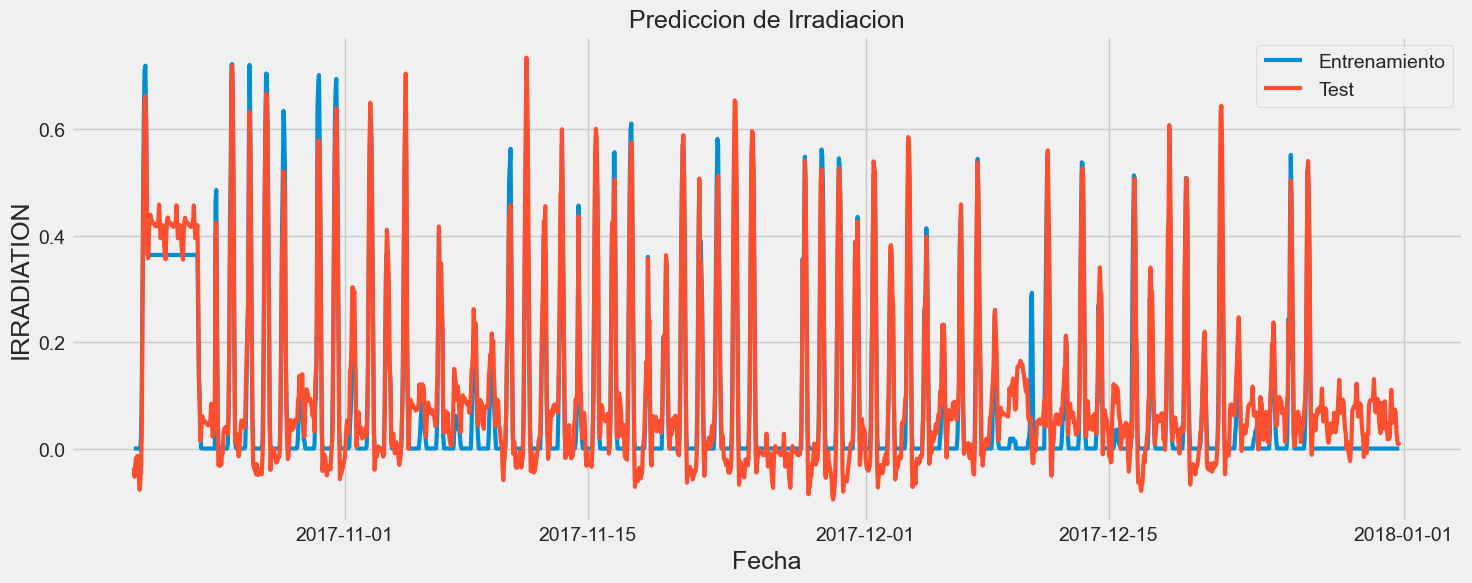

In [161]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd

# Asegúrate de que el índice sea de tipo datetime
test.index = pd.to_datetime(test.index)

predictionsSARI = sarima_model_fit.predict(start=test.index[0], end=test.index[-1],
                                            exog=test[['AMBIENT_TEMPERATURE', 'MODULE_TEMPERATURE',	'WIND_SPEED']])




plt.figure(figsize= (16, 6))
plt.title('Prediccion de Irradiacion', fontsize= 18)
plt.xlabel('Fecha', fontsize= 18)
plt.ylabel('IRRADIATION', fontsize= 18)
#plt.plot(train['IRRADIATION'], linewidth= 3)
plt.plot(test['IRRADIATION'], linewidth= 3)
plt.plot(predictionsSARI, linewidth= 3)
plt.legend(['Entrenamiento', 'Test', 'Predicccion'])


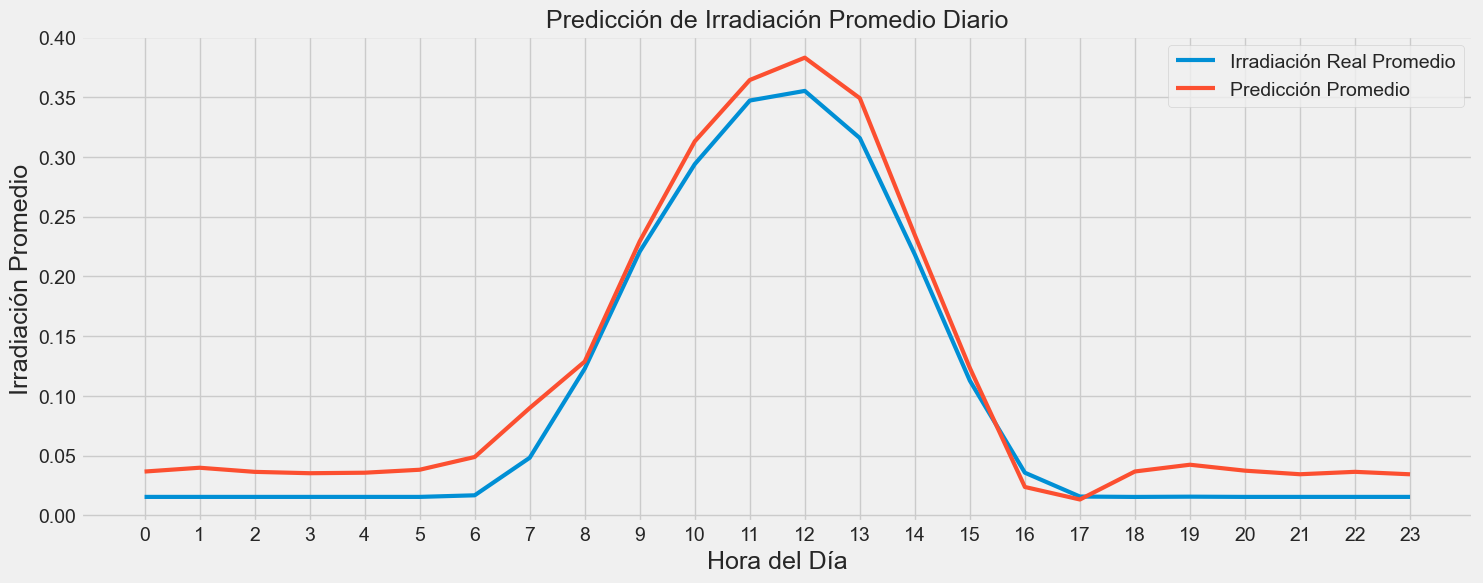

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Asegúrate de que el índice sea de tipo datetime
test.index = pd.to_datetime(test.index)

# Generar las predicciones
predictionsSARI = sarima_model_fit.predict(
    start=test.index[0],
    end=test.index[-1],
    exog=test[['AMBIENT_TEMPERATURE', 'MODULE_TEMPERATURE', 'WIND_SPEED']]
)

# Combinar los datos reales y las predicciones en un DataFrame
df = pd.DataFrame({
    'IRRADIATION': test['IRRADIATION'],
    'PREDICCION': predictionsSARI
})

# Extraer la hora del índice datetime
df['HORA'] = df.index.hour

# Agrupar por hora y calcular el promedio
df_promedio = df.groupby('HORA').mean()

# Graficar los promedios
plt.figure(figsize=(16, 6))
plt.title('Predicción de Irradiación Promedio Diario', fontsize=18)
plt.xlabel('Hora del Día', fontsize=18)
plt.ylabel('Irradiación Promedio', fontsize=18)
plt.plot(df_promedio.index, df_promedio['IRRADIATION'], linewidth=3)
plt.plot(df_promedio.index, df_promedio['PREDICCION'], linewidth=3)
plt.legend(['Irradiación Real Promedio', 'Predicción Promedio'], fontsize=14)
plt.xticks(range(0, 24))  # Mostrar cada hora en el eje x
plt.grid(True)
plt.show()


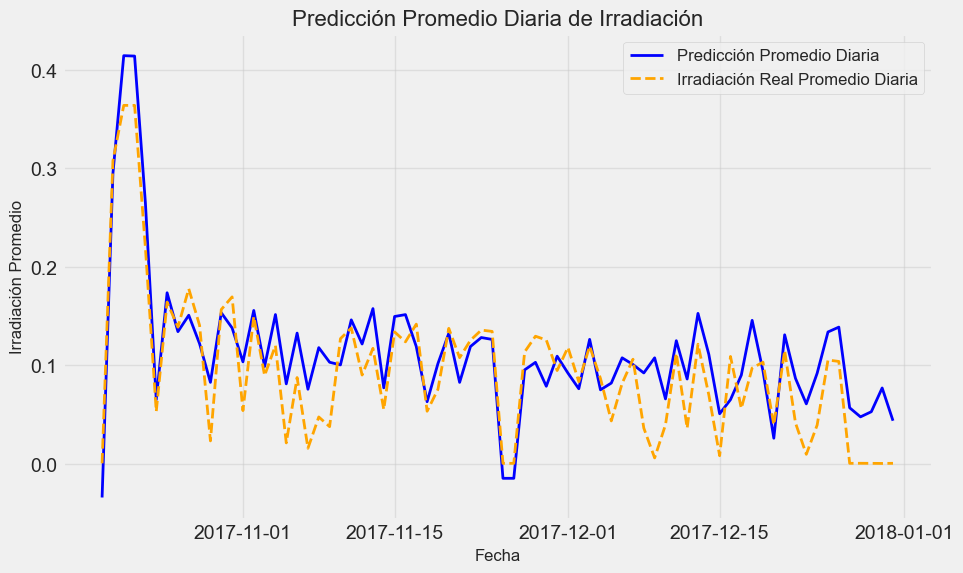

In [163]:
import matplotlib.pyplot as plt
import pandas as pd

# Generar predicciones (este bloque debe reemplazarse con tus datos reales)
future_exog = test[['AMBIENT_TEMPERATURE', 'MODULE_TEMPERATURE', 'WIND_SPEED']].iloc[-len(test):]
predictions = sarima_model_fit.forecast(steps=len(test), exog=future_exog)

# Convertir el índice a formato datetime si no lo está
predictions.index = pd.to_datetime(predictions.index)

# Agrupar las predicciones por día y calcular el promedio
predictions_daily = predictions.resample('D').mean()

# Crear el gráfico
plt.figure(figsize=(10, 6))
plt.plot(predictions_daily, label='Predicción Promedio Diaria', color='blue', linewidth=2)

# Opcional: agregar la serie original promedio diaria
if 'IRRADIATION' in test.columns:
    actual_daily = test['IRRADIATION'].resample('D').mean()
    plt.plot(actual_daily, label='Irradiación Real Promedio Diaria', color='orange', linewidth=2, linestyle='--')

# Personalizar el gráfico
plt.title('Predicción Promedio Diaria de Irradiación', fontsize=16)
plt.xlabel('Fecha', fontsize=12)
plt.ylabel('Irradiación Promedio', fontsize=12)
plt.legend(fontsize=12)
plt.grid(alpha=0.5)
plt.show()


### GUARDAR MODELO

In [165]:
import joblib
joblib.dump(sarima_model_fit, 'sarima_model.pkl')

['sarima_model.pkl']

# RANDOM FOREST

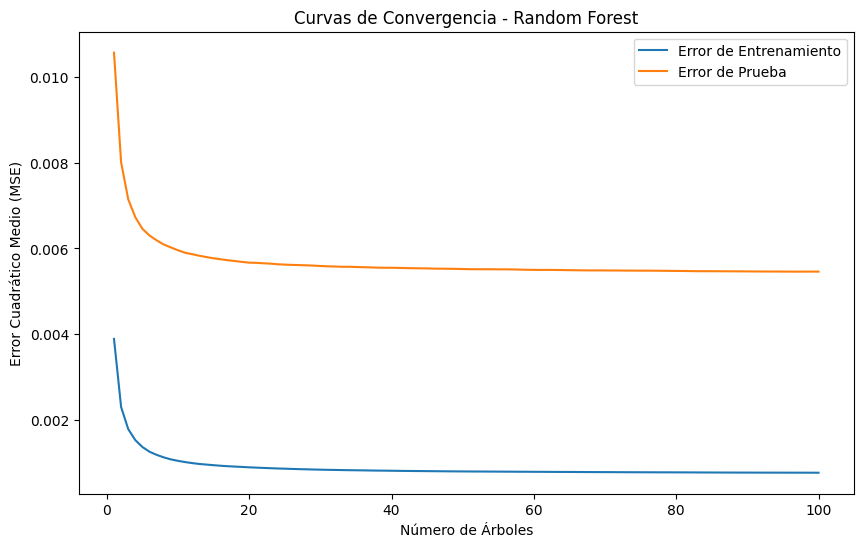

In [ ]:

import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor

# Definir el modelo de RandomForest con un número elevado de árboles
rfr = RandomForestRegressor(n_estimators=50, warm_start=True, random_state=42)

# Inicializar listas para almacenar los errores
train_errors = []
test_errors = []

# Iterar sobre los árboles agregando cada vez uno más
for i in range(1, 101):
    rfr.set_params(n_estimators=i)
    rfr.fit(X_train, y_train)

    # Predicciones en los conjuntos de entrenamiento y prueba
    y_train_pred = rfr.predict(X_train)
    y_test_pred = rfr.predict(X_test)

    # Calcular el error cuadrático medio
    train_errors.append(mean_squared_error(y_train, y_train_pred))
    test_errors.append(mean_squared_error(y_test, y_test_pred))




In [ ]:
y_pred_rfr = rfr.predict(X_test)
R2_Score_rfr = round(r2_score(y_pred_rfr,y_test) * 100, 2)

print("R2 Score : ",R2_Score_rfr,"%")

R2 Score :  92.22 %


# LSTM

### DEFINIENDO LOS DATOS

In [14]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping

In [38]:
df_hourly_avg.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8755 entries, 2017-01-01 00:00:00 to 2017-12-31 18:00:00
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   MODULE_TEMPERATURE   8755 non-null   float64
 1   AMBIENT_TEMPERATURE  8755 non-null   float64
 2   IRRADIATION          8755 non-null   float64
 3   WIND_SPEED           8755 non-null   float64
dtypes: float64(4)
memory usage: 342.0 KB


In [39]:
df_hourly_avg.head()

,MODULE_TEMPERATURE,AMBIENT_TEMPERATURE,IRRADIATION,WIND_SPEED
DATE_TIME,,,,
2017-01-01 00:00:00,4.838128,6.552489,0.000458,4.446809
2017-01-01 01:00:00,2.365638,6.002468,0.000482,2.978723
2017-01-01 02:00:00,0.019255,5.240327,0.000512,1.825455
2017-01-01 03:00:00,-0.730867,4.760217,0.000562,1.861667
2017-01-01 04:00:00,2.146925,4.609264,0.000557,1.733962


In [40]:
df3 = df_hourly_avg.copy()
df3['HORA'] = df3.index.hour
df3

,MODULE_TEMPERATURE,AMBIENT_TEMPERATURE,IRRADIATION,WIND_SPEED,HORA
DATE_TIME,,,,,
2017-01-01 00:00:00,4.838128,6.552489,0.000458,4.446809,0
2017-01-01 01:00:00,2.365638,6.002468,0.000482,2.978723,1
2017-01-01 02:00:00,0.019255,5.240327,0.000512,1.825455,2
2017-01-01 03:00:00,-0.730867,4.760217,0.000562,1.861667,3
2017-01-01 04:00:00,2.146925,4.609264,0.000557,1.733962,4
...,...,...,...,...,...
2017-12-31 14:00:00,-12.030000,-9.840000,0.000554,3.400000,14
2017-12-31 15:00:00,-12.030000,-9.840000,0.000554,3.400000,15
2017-12-31 16:00:00,-12.030000,-9.840000,0.000554,3.400000,16


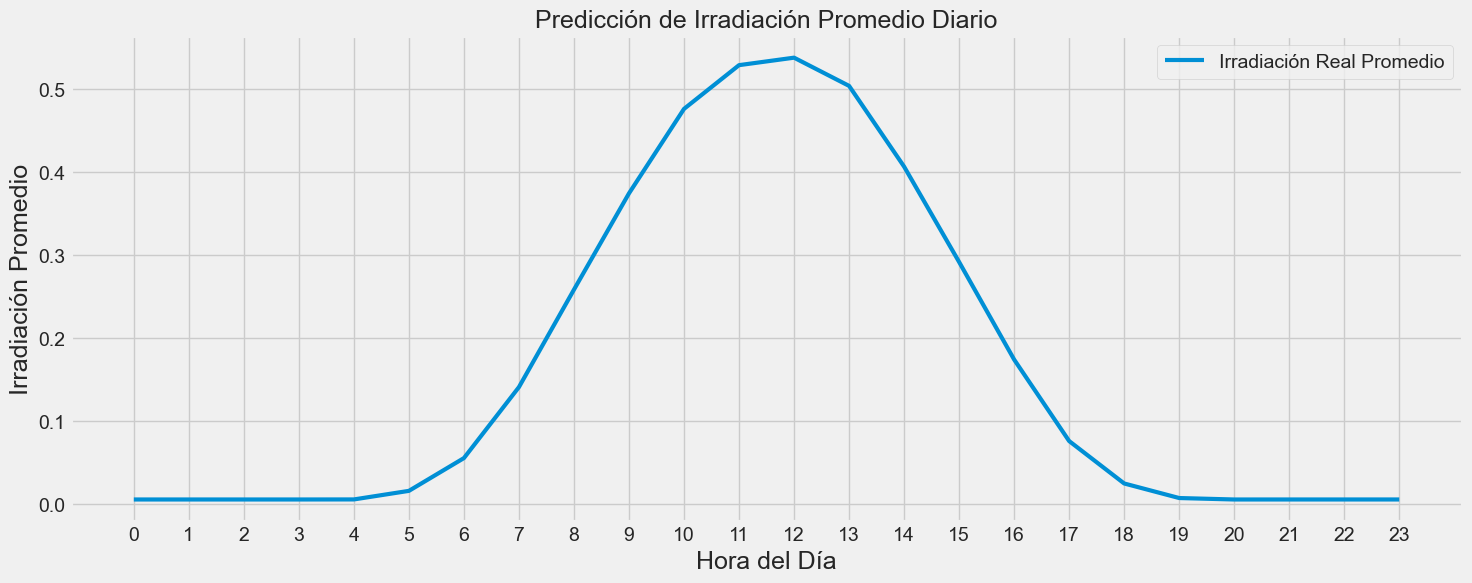

In [41]:
import matplotlib.pyplot as plt
import pandas as pd

# Asegúrate de que el índice sea de tipo datetime
df_hourly_avg.index = pd.to_datetime(df_hourly_avg.index)

# Agrupar por hora y calcular el promedio
df_promedio = df3.groupby('HORA').mean()

# Graficar los promedios
plt.figure(figsize=(16, 6))
plt.title('Predicción de Irradiación Promedio Diario', fontsize=18)
plt.xlabel('Hora del Día', fontsize=18)
plt.ylabel('Irradiación Promedio', fontsize=18)
plt.plot(df_promedio.index, df_promedio['IRRADIATION'], linewidth=3)
plt.legend(['Irradiación Real Promedio'], fontsize=14)
plt.xticks(range(0, 24))  # Mostrar cada hora en el eje x
plt.grid(True)
plt.show()


In [42]:
print(df_hourly_avg.columns)


Index(['MODULE_TEMPERATURE', 'AMBIENT_TEMPERATURE', 'IRRADIATION',
       'WIND_SPEED'],
      dtype='object')


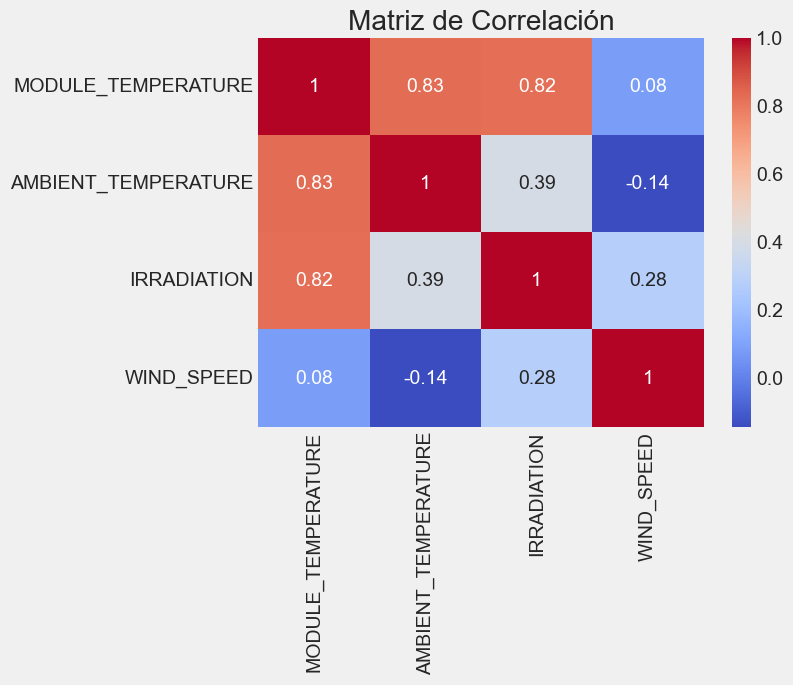

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt

corr_matrix = df_hourly_avg.corr()
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.title("Matriz de Correlación")
plt.show()


In [44]:
n_cols = 1
dataset = df_hourly_avg['IRRADIATION']
dataset = pd.DataFrame(dataset)
data = dataset.values
data.shape

(8755, 1)

In [45]:

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range= (0, 1))
scaled_data = scaler.fit_transform(np.array(data))

In [46]:
train_size = int(len(data) * 0.8)
test_size = len(data) - train_size
print("Train Size :",train_size,"Test Size :",test_size)
train_data = scaled_data[0:train_size, :]
train_data.shape

Train Size : 7004 Test Size : 1751


(7004, 1)

In [47]:
x_train_LSTM = []
y_train_LSTM = []
time_steps = 60
n_cols = 1

In [48]:
for i in range(time_steps, len(scaled_data)):
    x_train_LSTM.append(scaled_data[i-time_steps:i, :n_cols])
    y_train_LSTM.append(scaled_data[i, :n_cols])


In [49]:
# Convert to numpy array
x_train_LSTM, y_train_LSTM = np.array(x_train_LSTM), np.array(y_train_LSTM)

x_train_LSTM = np.reshape(x_train_LSTM, (x_train_LSTM.shape[0], x_train_LSTM.shape[1], n_cols))

In [50]:
from sklearn.model_selection import train_test_split

# Dividir en entrenamiento y validación
x_train_LSTM, x_val, y_train_LSTM, y_val = train_test_split(
    x_train_LSTM, y_train_LSTM, test_size=0.2, random_state=42
)

time_steps = 60
test_data = scaled_data[train_size - time_steps:, :]

x_test_LSTM = []
y_test_LSTM = []
n_cols = 1

for i in range(time_steps, len(test_data)):
    x_test_LSTM.append(test_data[i-time_steps:i, 0:n_cols])
    y_test_LSTM.append(test_data[i, 0:n_cols])
x_test_LSTM, y_test_LSTM = np.array(x_test_LSTM), np.array(y_test_LSTM)
x_test_LSTM = np.reshape(x_test_LSTM, (x_test_LSTM.shape[0], x_test_LSTM.shape[1], n_cols))


In [51]:
# Verificar las formas de los datos
print(f"x_train_LSTM shape: {x_train_LSTM.shape}")
print(f"y_train_LSTM shape: {y_train_LSTM.shape}")
print(f"x_val shape: {x_val.shape}")
print(f"y_val shape: {y_val.shape}")
print(f"x_test_LSTM shape: {x_test_LSTM.shape}")
print(f"y_test_LSTM shape: {y_test_LSTM.shape}")

x_train_LSTM shape: (6956, 60, 1)
y_train_LSTM shape: (6956, 1)
x_val shape: (1739, 60, 1)
y_val shape: (1739, 1)
x_test_LSTM shape: (1751, 60, 1)
y_test_LSTM shape: (1751, 1)


### MODELO

In [52]:
model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(x_train_LSTM.shape[1], x_train_LSTM.shape[2])),
    Dropout(0.2),
    LSTM(64, return_sequences=False),
    Dropout(0.2),
    Dense(32, activation='relu'),
    BatchNormalization(),
    Dense(16, activation='relu'),
    Dense(1)  # Capa de salida para irradiación
])




In [53]:
import tensorflow.keras.backend as K

# Definir métricas personalizadas
def rmse(y_true, y_pred):
    return K.sqrt(K.mean(K.square(y_pred - y_true)))

def r2_score(y_true, y_pred):
    total_error = K.sum(K.square(y_true - K.mean(y_true)))
    residual_error = K.sum(K.square(y_true - y_pred))
    return 1 - (residual_error / total_error)

# Compilar el modelo
model.compile(optimizer='adam', loss='mse', metrics=['mean_absolute_error', rmse, r2_score])


In [54]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 60, 50)         │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 60, 50)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 64)             │        29,440 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 42,593 (166.38 KB)

 Trainable params: 42,529 (166.13 KB)

 Non-trainable params: 64 (256.00 B)

In [55]:

# Early stopping
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=30,
    restore_best_weights=True
)

# Entrenar el modelo
history = model.fit(
    x_train_LSTM, y_train_LSTM,
    validation_data=(x_val, y_val),
    epochs=100,
    batch_size=32,
    callbacks=[early_stopping],
    verbose=1
)



Epoch 1/100
218/218 ━━━━━━━━━━━━━━━━━━━━ 11s 31ms/step - loss: 0.0353 - mean_absolute_error: 0.1252 - r2_score: 0.4398 - rmse: 0.1734 - val_loss: 0.0659 - val_mean_absolute_error: 0.1529 - val_r2_score: -0.0183 - val_rmse: 0.2511
Epoch 2/100
218/218 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.0112 - mean_absolute_error: 0.0711 - r2_score: 0.7889 - rmse: 0.1036 - val_loss: 0.0313 - val_mean_absolute_error: 0.1159 - val_r2_score: 0.5151 - val_rmse: 0.1730
Epoch 3/100
218/218 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0101 - mean_absolute_error: 0.0651 - r2_score: 0.8176 - rmse: 0.0975 - val_loss: 0.0107 - val_mean_absolute_error: 0.0682 - val_r2_score: 0.8294 - val_rmse: 0.1010
Epoch 4/100
218/218 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.0086 - mean_absolute_error: 0.0582 - r2_score: 0.8436 - rmse: 0.0902 - val_loss: 0.0064 - val_mean_absolute_error: 0.0570 - val_r2_score: 0.8833 - val_rmse: 0.0792
Epoch 5/100
218/218 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - loss: 0.0078 - mean_absolute_e

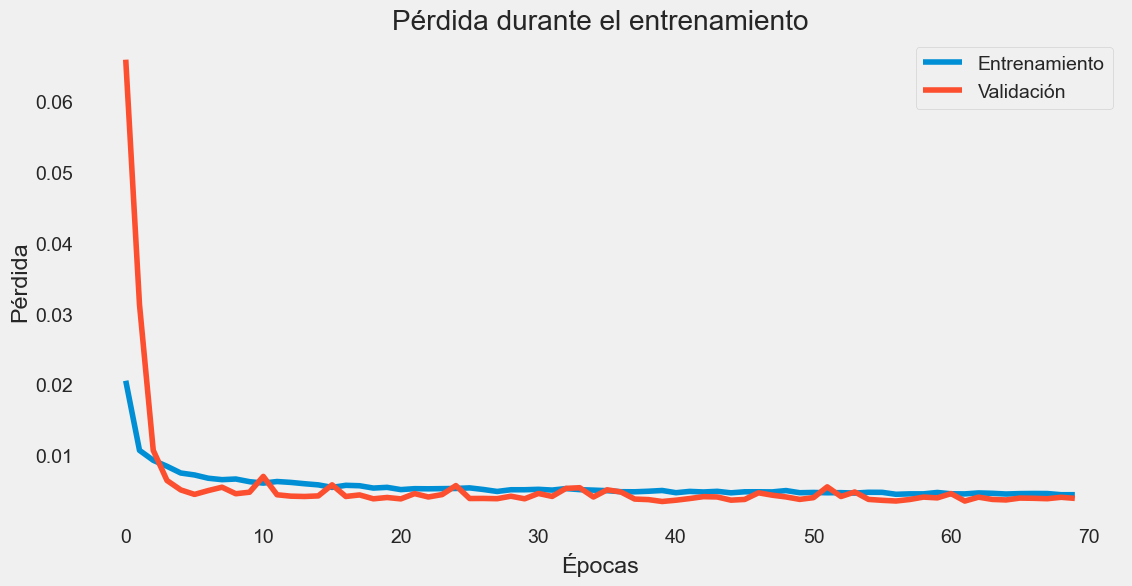

In [56]:
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Entrenamiento')
plt.plot(history.history['val_loss'], label='Validación')
plt.title('Pérdida durante el entrenamiento')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()
plt.grid()
plt.show()


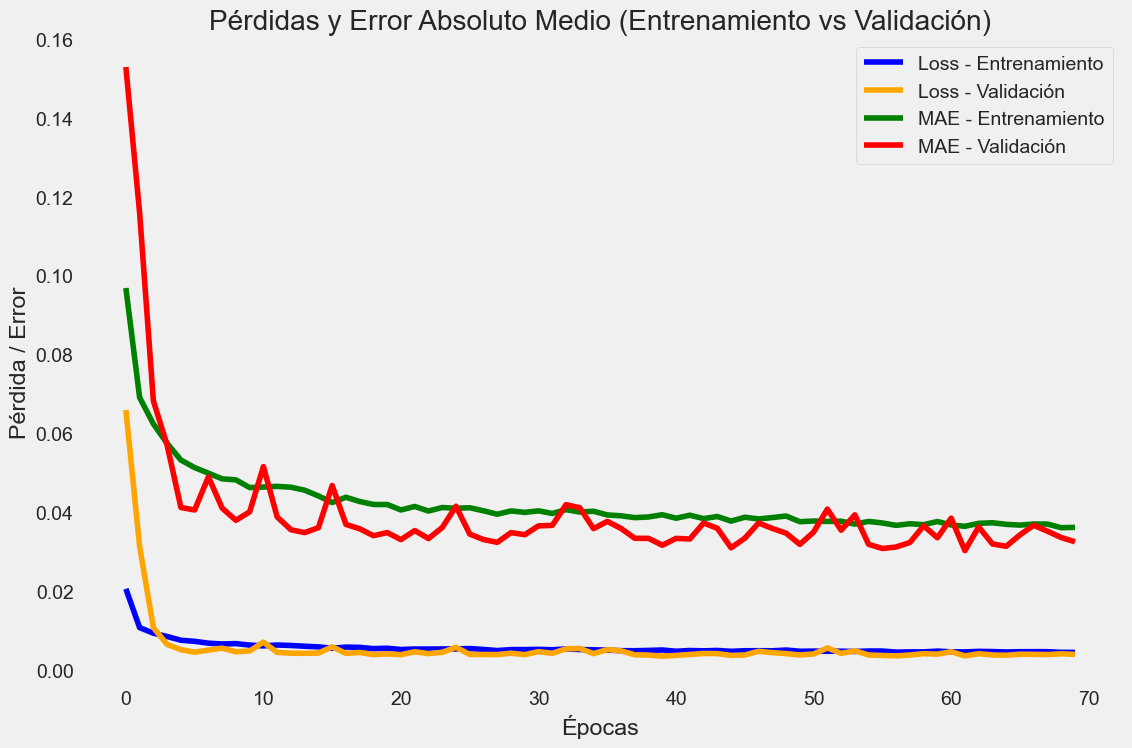

In [57]:
plt.figure(figsize=(12, 8))
plt.plot(history.history["loss"], label="Loss - Entrenamiento", color="blue")
plt.plot(history.history["val_loss"], label="Loss - Validación", color="orange")
plt.plot(history.history["mean_absolute_error"], label="MAE - Entrenamiento", color="green")
plt.plot(history.history["val_mean_absolute_error"], label="MAE - Validación", color="red")
plt.title("Pérdidas y Error Absoluto Medio (Entrenamiento vs Validación)")
plt.xlabel("Épocas")
plt.ylabel("Pérdida / Error")
plt.legend()
plt.grid()
plt.show()


In [58]:
# Get Prediction
predictions = model.predict(x_test_LSTM)

55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step


In [59]:
predictions.shape

(1751, 1)

### GRAFICAS

In [60]:
RMSE = np.sqrt(np.mean( y_test_LSTM - predictions )**2)
RMSE

0.009930765155493947

In [61]:
np.set_printoptions(threshold=10)  # Limita a 10 elementos
print(y_test_LSTM)

[[0.00026472]
 [0.00029928]
 [0.00024413]
 ...
 [0.00032712]
 [0.0001995 ]
 [0.00019267]]


In [62]:
preds_acts = pd.DataFrame(data={'Predictions':predictions.flatten(), 'Actuals':y_test_LSTM.flatten()})
preds_acts

,Predictions,Actuals
0,0.001566,0.000265
1,-0.002440,0.000299
2,-0.004429,0.000244
3,-0.005025,0.000139
4,-0.004581,0.000170
...,...,...
1746,0.009903,0.000327
1747,0.009901,0.000327
1748,0.009899,0.000327
1749,0.009897,0.000199


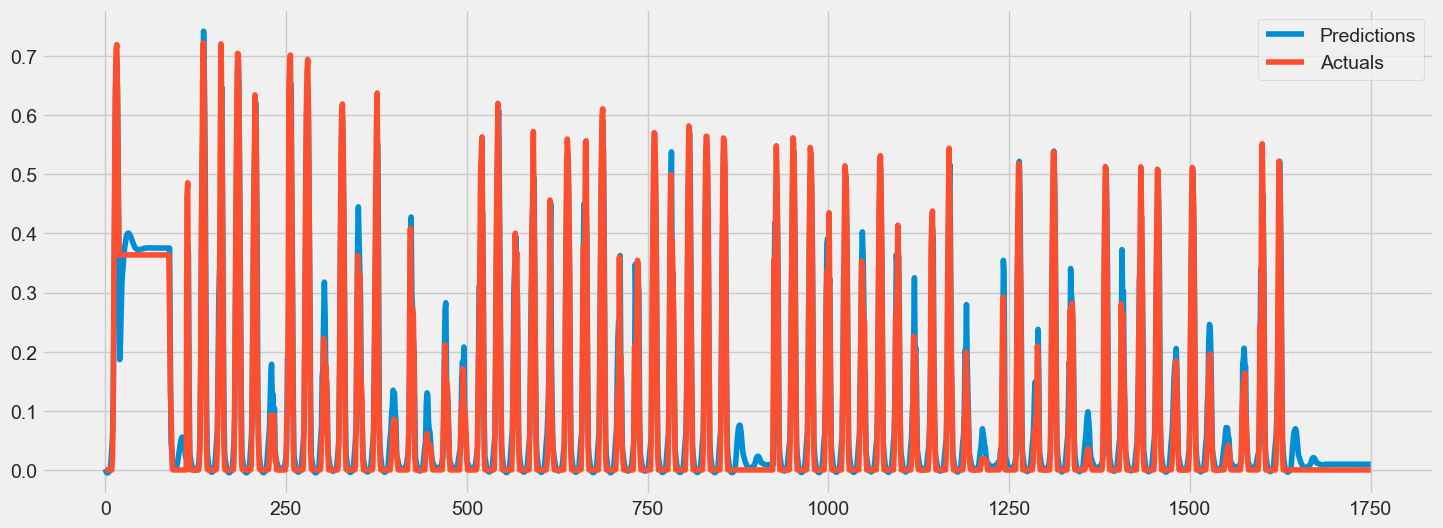

In [63]:
plt.figure(figsize = (16, 6))
plt.plot(preds_acts['Predictions'])
plt.plot(preds_acts['Actuals'])
plt.legend(['Predictions', 'Actuals'])
plt.show()

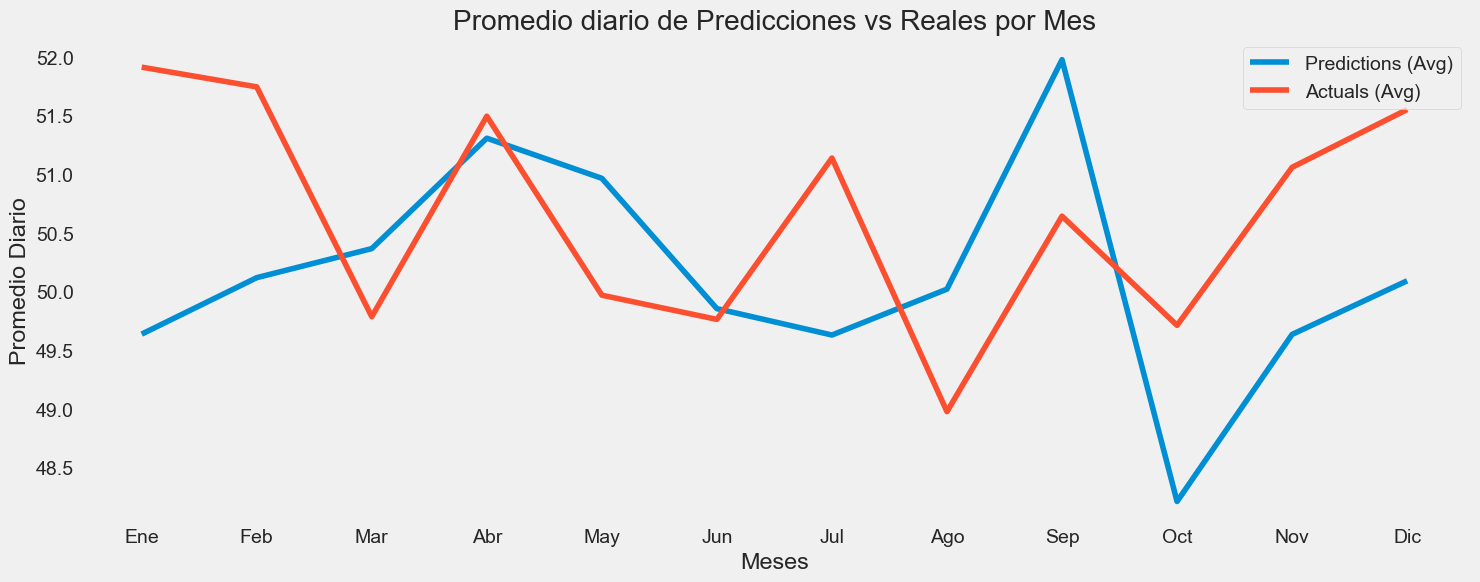

In [64]:

import numpy as np
date_rng = pd.date_range(start="2023-01-01", end="2023-12-31 23:00", freq="H")
preds_acts = pd.DataFrame({
    'Predictions': np.random.rand(len(date_rng)) * 100,  # Datos simulados
    'Actuals': np.random.rand(len(date_rng)) * 100,  # Datos simulados
}, index=date_rng)
preds_acts.index.name = 'DateTime'

# Calcular promedios diarios
daily_avg = preds_acts.resample('D').mean()

# Gráfico de promedios diarios por meses
plt.figure(figsize=(16, 6))
daily_avg['Predictions'].groupby(daily_avg.index.month).mean().plot(label='Predictions (Avg)')
daily_avg['Actuals'].groupby(daily_avg.index.month).mean().plot(label='Actuals (Avg)')
plt.title('Promedio diario de Predicciones vs Reales por Mes')
plt.xlabel('Meses')
plt.ylabel('Promedio Diario')
plt.xticks(ticks=range(1, 13), labels=['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun', 'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic'])
plt.legend()
plt.grid()
plt.show()

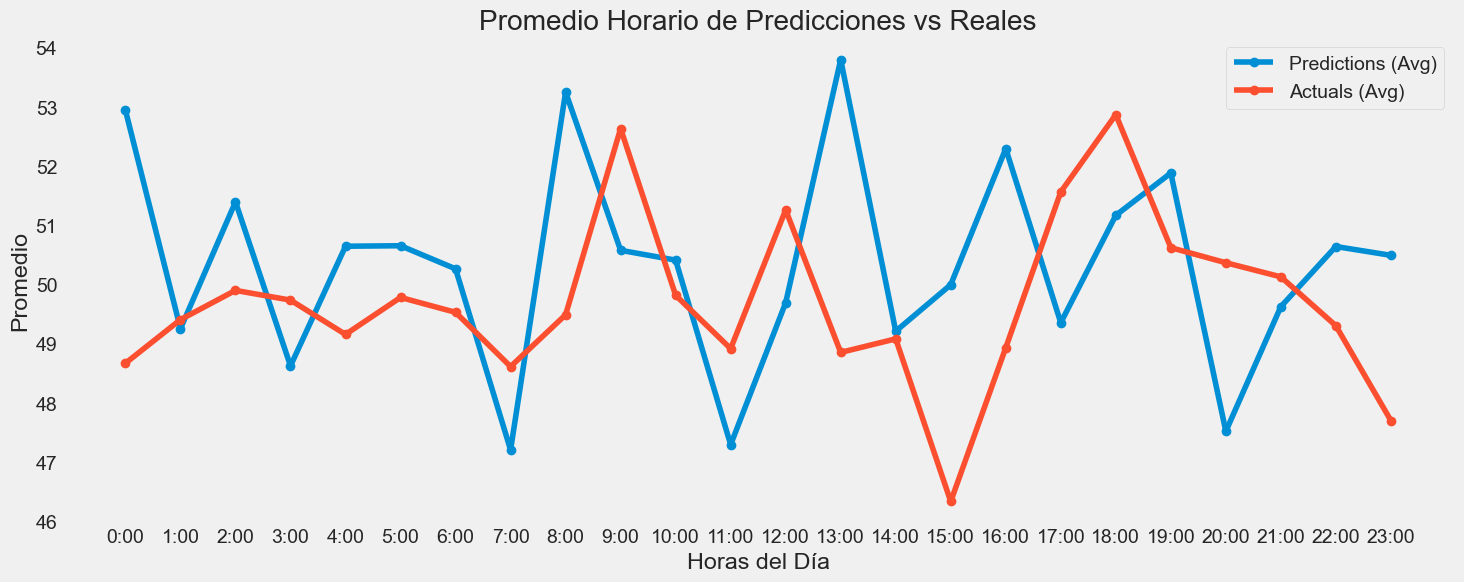

In [442]:
# Calcular promedios horarios
hourly_avg = preds_acts.groupby(preds_acts.index.hour).mean()

# Gráfico de promedios horarios
plt.figure(figsize=(16, 6))
hourly_avg['Predictions'].plot(label='Predictions (Avg)', marker='o')
hourly_avg['Actuals'].plot(label='Actuals (Avg)', marker='o')
plt.title('Promedio Horario de Predicciones vs Reales')
plt.xlabel('Horas del Día')
plt.ylabel('Promedio')
plt.xticks(ticks=range(0, 24), labels=[f'{i}:00' for i in range(24)])
plt.legend()
plt.grid()
plt.show()

# PREDICCION DE RESULTADOS CON RANDOM FOREST

In [ ]:
X_test.head()

,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,WIND_SPEED,SEASON
333998,21.420,27.330,0.5,1
23070,-7.025,-6.160,2.0,2
28538,6.870,4.165,8.0,2
266661,23.700,19.730,0.4,4
1283,7.937,7.928,1.2,2


In [ ]:
prediction =rfr.predict(X_test)
print(prediction)

[0.1311192  0.03397899 0.00043972 ... 0.01901511 0.1832828  0.1082979 ]


In [ ]:
cross_checking1 = pd.DataFrame({'Actual': y_test.iloc[:, 0], 'Predicted': prediction}) # Removed the extra index [:, 0] from prediction
cross_checking1.head()

,Actual,Predicted
333998,0.184200,0.131119
23070,0.033430,0.033979
28538,0.000460,0.000440
266661,0.000437,0.000877
1283,0.000322,0.002403


In [ ]:
cross_checking = pd.DataFrame({'Actual': y_test.iloc[:, 0], 'Predicted': prediction})
cross_checking.head()

,Actual,Predicted
333998,0.184200,0.131119
23070,0.033430,0.033979
28538,0.000460,0.000440
266661,0.000437,0.000877
1283,0.000322,0.002403


In [ ]:
cross_checking['Error'] = cross_checking['Actual'] - cross_checking['Predicted']
cross_checking.head()

,Actual,Predicted,Error
333998,0.184200,0.131119,0.053081
23070,0.033430,0.033979,-0.000549
28538,0.000460,0.000440,0.000020
266661,0.000437,0.000877,-0.000440
1283,0.000322,0.002403,-0.002081


In [ ]:
cross_checking_final  = cross_checking[cross_checking['Error'] <= 20]
cross_checking_final.sample(25).style.background_gradient(
        cmap='coolwarm').set_properties(**{
            'font-family': 'Lucida Calligraphy',
            'color': 'LigntGreen',
            'font-size': '15px'
        })

,Actual,Predicted,Error
297017,0.574300,0.587715,-0.013415
176078,0.976000,0.961200,0.014800
135626,0.640600,0.582732,0.057868
12252,0.283000,0.300992,-0.017992
273321,0.000495,0.000656,-0.000161
161324,0.000406,0.001234,-0.000828
314742,0.000576,0.000920,-0.000344
406897,0.000550,0.000709,-0.000159
71506,0.087200,0.116294,-0.029094
130321,0.000405,0.000426,-0.000021


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


y_pred = rfr.predict(X_test)


mae = mean_absolute_error(y_test, y_pred)
rmse1 = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
print("MAE (SIN Optuna):", mae)
print("RMSE (SIN Optuna):", rmse1)
print("R2 Score (SIN Optuna):", r2)

MAE (SIN Optuna): 0.03519488975577049
RMSE (SIN Optuna): 0.07388251994907917
R2 Score (SIN Optuna): 0.9273729232624497


In [ ]:
rmse_percentage1 = (rmse1 / y_test.mean()) * 100
print(f"RMSE como porcentaje de la media: {rmse_percentage1['IRRADIATION']:.2f}%")

RMSE como porcentaje de la media: 39.09%


# VISUALIZAR CORRELACIONES



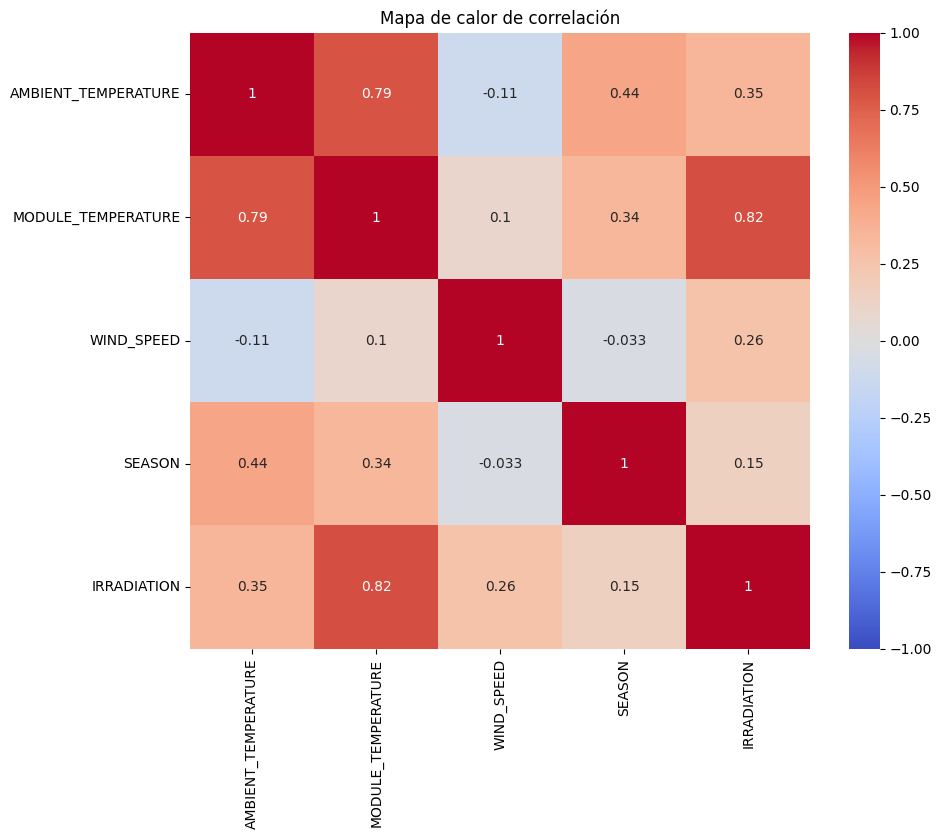

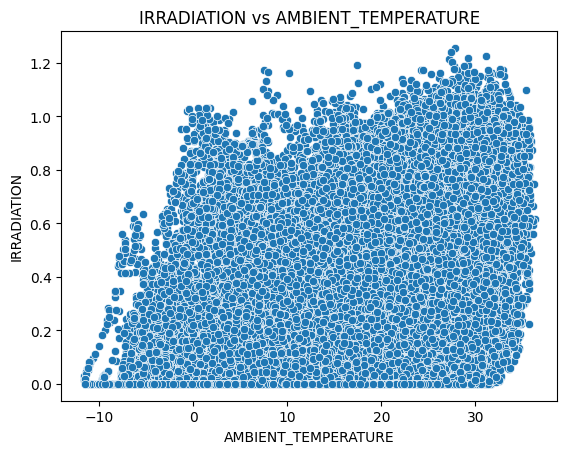

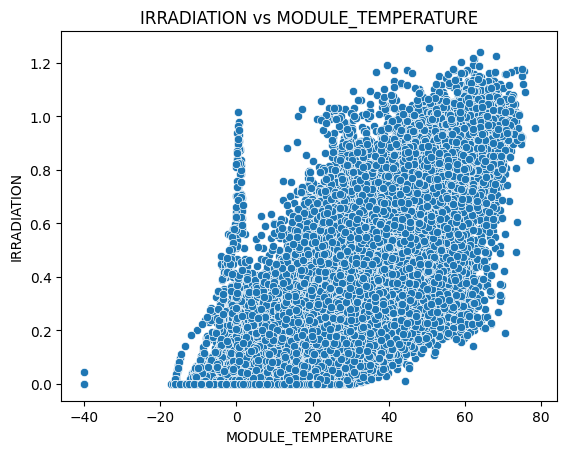

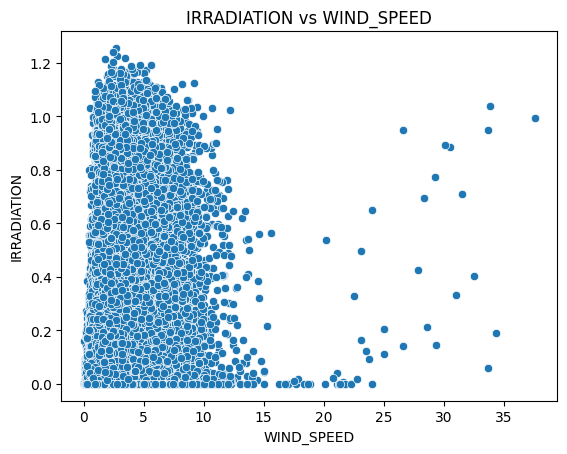

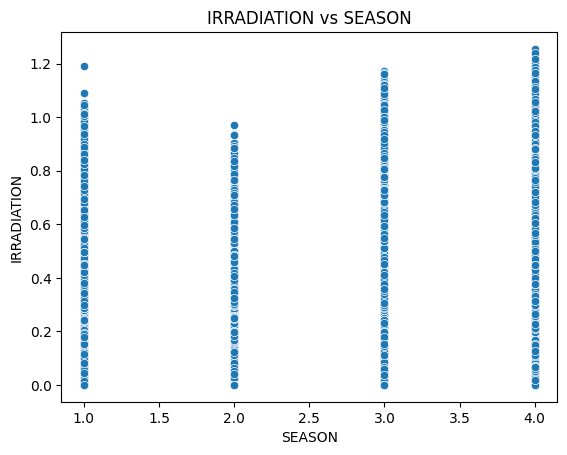

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Combinar X_test y y_test en un solo DataFrame
df_corr = X_test.copy()
df_corr['IRRADIATION'] = y_test['IRRADIATION']  # Agregar la variable objetivo

# Mapa de calor de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(df_corr.corr(), annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Mapa de calor de correlación")
plt.show()

# Graficos de dispersión entre cada variable independiente y AC_POWER
for col in X_test.columns:
    plt.figure()
    sns.scatterplot(x=df_corr[col], y=df_corr['IRRADIATION'])
    plt.title(f"IRRADIATION vs {col}")
    plt.xlabel(col)
    plt.ylabel("IRRADIATION")
    plt.show()


Se puede obervar que existen casos donde la irradiancia es mayor a 0, y el valor de DC_POWER es 0

**Optuna**

In [ ]:
pip install optuna

In [ ]:
import optuna
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.tree import DecisionTreeRegressor
import numpy as np

def objective(trial):
    # Definir los hiperparámetros que Optuna optimizará
    max_depth = trial.suggest_int("max_depth", 5, 20)
    min_samples_split = trial.suggest_int("min_samples_split", 2, 10)
    min_samples_leaf = trial.suggest_int("min_samples_leaf", 1, 5)

    # Crear el modelo con los hiperparámetros propuestos
    rfr = DecisionTreeRegressor(
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        random_state=42,
        criterion='squared_error',
        splitter='best',
        max_features=None,
        min_impurity_decrease=0.0,
        ccp_alpha=0.0
    )

    # Entrenar el modelo
    rfr.fit(X_train, y_train)

    # Predicciones y cálculo del RMSE
    y_pred = rfr.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))  # Usar RMSE

    return rmse


# Ejecutar Optuna para la optimización
study = optuna.create_study(direction="minimize")
study.optimize(objective, n_trials=100)

# Obtener los mejores hiperparámetros y MAE
best_params = study.best_params
best_rmse = study.best_value

print("Mejores hiperparámetros (Optuna):", best_params)
print("Mejor RMSE (Optuna):", best_rmse)

# Re-train the model with the best parameters and predict on the test set
best_model = DecisionTreeRegressor(**best_params)  # Create model with best params
best_model.fit(X_train, y_train)                  # Train the model
y_pred = best_model.predict(X_test)               # Predict on test set


mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("MAE (Optuna):", mae)
print("R2 Score (Optuna):", r2)

[I 2024-11-20 04:51:08,042] A new study created in memory with name: no-name-695d1f0c-8ab6-45d0-a8e6-67fa6c9fc562
[I 2024-11-20 04:51:09,120] Trial 0 finished with value: 0.07963213768614798 and parameters: {'max_depth': 9, 'min_samples_split': 7, 'min_samples_leaf': 2}. Best is trial 0 with value: 0.07963213768614798.
[I 2024-11-20 04:51:11,688] Trial 1 finished with value: 0.07716067883493272 and parameters: {'max_depth': 13, 'min_samples_split': 5, 'min_samples_leaf': 5}. Best is trial 1 with value: 0.07716067883493272.
[I 2024-11-20 04:51:14,400] Trial 2 finished with value: 0.07716067883493272 and parameters: {'max_depth': 13, 'min_samples_split': 4, 'min_samples_leaf': 5}. Best is trial 1 with value: 0.07716067883493272.
[I 2024-11-20 04:51:16,502] Trial 3 finished with value: 0.08201641572827263 and parameters: {'max_depth': 16, 'min_samples_split': 8, 'min_samples_leaf': 3}. Best is trial 1 with value: 0.07716067883493272.
[I 2024-11-20 04:51:20,951] Trial 4 finished with value

Mejores hiperparámetros (Optuna): {'max_depth': 11, 'min_samples_split': 5, 'min_samples_leaf': 5}
Mejor RMSE (Optuna): 0.076556750371172
MAE (Optuna): 0.04017701173167331
R2 Score (Optuna): 0.9220201948591813


In [ ]:
rmse_percentage = (best_rmse / y_test.mean()) * 100
print(f"RMSE como porcentaje de la media: {rmse_percentage['IRRADIATION']:.2f}%")


RMSE como porcentaje de la media: 40.50%


**GRID SEARCH**

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Definir el modelo y los rangos de hiperparámetros para GridSearch
param_grid = {
    'max_depth': range(5, 31, 5),
    'min_samples_split': range(2, 11, 2),
    'min_samples_leaf': range(1, 6)
}

# Configurar GridSearchCV
grid_search = GridSearchCV(
    estimator=DecisionTreeRegressor(),
    param_grid=param_grid,
    scoring='neg_root_mean_squared_error',  # Minimizar el RMSE
    cv=5,                                   # Validación cruzada con 5 particiones
    n_jobs=-1, # Utilizar todos los núcleos disponibles
    verbose=2,  # Mostrar mensajes de progreso
    refit=True,  # Re-entrenar el modelo con los mejores hiperparámetros
    return_train_score=True,  # Devolver el puntaje de entrenamiento
    error_score='raise',  # Manejar errores
    pre_dispatch='2*n_jobs',  # Paralelizar el ajuste de hiperparámetros

)

# Ejecutar GridSearchCV
grid_search.fit(X_train, y_train)

# Obtener los mejores parámetros y RMSE
best_params_grid = grid_search.best_params_
best_rmse_grid = -grid_search.best_score_

print("Mejores hiperparámetros (GridSearchCV):", best_params_grid)
print("Mejor RMSE (GridSearchCV):", best_rmse_grid)

# Reentrenar el modelo con los mejores parámetros de GridSearch y hacer predicciones
best_model_grid = DecisionTreeRegressor(**best_params_grid)
best_model_grid.fit(X_train, y_train)
y_pred_grid = best_model_grid.predict(X_test)

# Calcular MAE y R2 Score
mae_grid = mean_absolute_error(y_test, y_pred_grid)
r2_grid = r2_score(y_test, y_pred_grid)
print("MAE (GridSearchCV):", mae_grid)
print("R2 Score (GridSearchCV):", r2_grid)


Fitting 5 folds for each of 150 candidates, totalling 750 fits
Mejores hiperparámetros (GridSearchCV): {'max_depth': 10, 'min_samples_leaf': 5, 'min_samples_split': 8}
Mejor RMSE (GridSearchCV): 0.07754584626286752
MAE (GridSearchCV): 0.041629877202842724
R2 Score (GridSearchCV): 0.9204145930157882


In [ ]:
import os

# Crear la carpeta 'output'
os.makedirs('output', exist_ok=True)

# Crear un DataFrame con los resultados
results = pd.DataFrame([best_params])
results['RMSE'] = best_rmse

# Guardar en CSV
results.to_csv("output/hyperparameter_optimization_results.csv", index=False)



In [ ]:
prediction_normal=rfr.predict(X_test)
prediction_optuna = best_model.predict(X_test)
prediction_grid = best_model_grid.predict(X_test)

In [ ]:
cross_checking = pd.DataFrame({'Actual' : y_test['IRRADIATION'] , 'Predicted_normal' : prediction_normal, 'Predicted_optuna' : prediction_optuna, 'Predicted_grid' : prediction_grid})
cross_checking.iloc[1002:1012]

,Actual,Predicted_normal,Predicted_optuna,Predicted_grid
122040,0.045960,0.042884,0.071259,0.051586
317014,0.000433,0.008222,0.007960,0.005212
347138,0.000441,0.001979,0.007684,0.011189
186657,0.548200,0.354860,0.379548,0.395429
358066,0.015680,0.005043,0.005813,0.007645
70386,0.487400,0.410425,0.467887,0.444186
305201,0.152800,0.189355,0.217112,0.210020
418440,0.159400,0.150405,0.138060,0.142519
404476,0.000282,0.002907,0.006535,0.007421
263717,0.055670,0.086778,0.101936,0.107665


In [ ]:
import numpy as np

# Calcular los errores en porcentaje con manejo de divisiones donde Actual - Predicted es 0
cross_checking['Error_normal'] = np.where(
    cross_checking['Actual'] - cross_checking['Predicted_normal'] == 0,
    0,
    abs(cross_checking['Actual'] - cross_checking['Predicted_normal']) * 100 / cross_checking['Actual']
)

cross_checking['Error_optuna'] = np.where(
    cross_checking['Actual'] - cross_checking['Predicted_optuna'] == 0,
    0,
    abs(cross_checking['Actual'] - cross_checking['Predicted_optuna']) * 100 / cross_checking['Actual']
)

cross_checking['Error_grid'] = np.where(
    cross_checking['Actual'] - cross_checking['Predicted_grid'] == 0,
    0,
    abs(cross_checking['Actual'] - cross_checking['Predicted_grid']) * 100 / cross_checking['Actual']
)

# Aplicar formato de estilo con un gradiente de color personalizado para resaltar errores altos en rojo
cross_checking.sample(25).style.background_gradient(
    cmap='coolwarm', subset=['Error_normal', 'Error_optuna', 'Error_grid']
).set_properties(**{
    'font-family': 'Lucida Calligraphy',
    'color': 'DarkBlack',
    'font-size': '15px'
})


,Actual,Predicted_normal,Predicted_optuna,Predicted_grid,Error_normal,Error_optuna,Error_grid
93541,0.907000,0.891361,0.879179,0.911636,1.724256,3.067388,0.511122
376598,0.052070,0.049237,0.085605,0.018610,5.440369,64.403775,64.259027
63190,0.353000,0.404244,0.410163,0.421157,14.516714,16.193366,19.307810
428333,0.000649,0.000551,0.015700,0.023963,15.060092,2319.152472,3592.251320
69898,0.000476,0.003492,0.005813,0.007645,633.556723,1121.216009,1506.094834
80874,0.393500,0.349177,0.137906,0.116522,11.263741,64.953924,70.388237
19573,0.000425,0.002599,0.009149,0.007656,511.437647,2052.618548,1701.433914
253959,1.148000,0.750965,0.791085,0.785978,34.584930,31.090196,31.535045
248174,0.044410,0.000552,0.012623,0.007739,98.755933,71.575650,82.572718
378046,0.277800,0.293627,0.330404,0.319691,5.697264,18.936017,15.079570


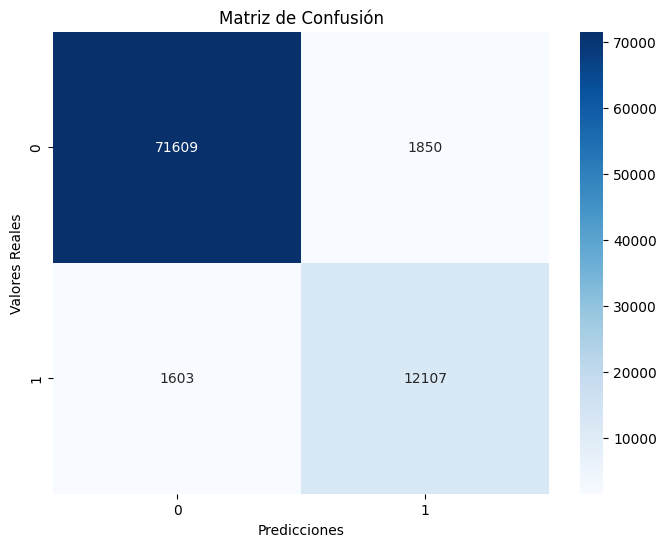

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Predecir los valores de prueba para la primera columna
y_pred_rfr = rfr.predict(X_test)

# Definir un umbral para categorizar las predicciones y los valores reales
threshold = 0.5  # Ajusta este valor según tus datos

# Convertir las predicciones y los valores reales en 0 y 1 (por ejemplo)
# Usando la primera columna de y_test
y_test_categorized = np.where(y_test > threshold, 1, 0)
y_pred_categorized = np.where(y_pred_rfr > threshold, 1, 0)

# Crear la matriz de confusión
conf_matrix = confusion_matrix(y_test_categorized, y_pred_categorized)

# Graficar la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicciones")
plt.ylabel("Valores Reales")
plt.title("Matriz de Confusión")
plt.show()

# **GUARDAR MODELO**

In [ ]:
import joblib


# Guardar el modelo
#joblib.dump(rfr, 'rfr.pkl')
joblib.dump(best_model, 'best_model.pkl')
joblib.dump(best_model_grid, 'best_model_grid.pkl')
# Guardar los datos
pd.to_pickle(X_train, 'X_train.pkl')
pd.to_pickle(X_test, 'X_test.pkl')
pd.to_pickle(y_train, 'y_train.pkl')
pd.to_pickle(y_test, 'y_test.pkl')



In [ ]:
joblib.dump(rfr, 'rfr.pkl')

['rfr.pkl']